#**Maximum Amount of Gold**
Task. Given 𝑛 gold bars, find the maximum weight of gold that fits into a bag of capacity 𝑊. Input Format. The first line of the input contains the capacity 𝑊 of a knapsack and the number 𝑛 of bars of gold. The next line contains 𝑛 integers 𝑤0,𝑤1, . . . ,𝑤𝑛−1 defining the weights of the bars of gold.

Output Format: Output the maximum weight of gold that fits into a knapsack of capacity 𝑊.

Constraints: 1 ≤ 𝑊 ≤ 10^4; 1 ≤ 𝑛 ≤ 300; 0 ≤ 𝑤0, . . . , 𝑤𝑛−1 ≤ 10^5.

**Sample:**

Imput: 

10 3

1 4 8

Output: 9

Here, the sum of the weights of the first and the last bar is equal to 9.

In [ ]:
def optimal_weight(W, w):

    golds = [0] + w
    gold_dict = {}
    for i in range(0, W+1):
        gold_dict[(i, 0)] = 0
    for i in range(0, len(golds)):
        gold_dict[(0, i)] = 0
    for i in range(1, len(golds)):
        for weight in range(1, W+1):
            gold_dict[(weight, i)] = gold_dict[(weight, (i-1))]
            if golds[i] <= weight:
                val = gold_dict[(weight-golds[i], i-1)] + golds[i]
                if gold_dict[(weight, i)] < val:
                    gold_dict[(weight, i)] = val
    return max(gold_dict.values())

    
W, n, =  map(int, input().split())
w = list(map(int, input().split()))
print(optimal_weight(W, w))

209 38
16 21 21 96 129 144 159 253 254 259 259 267 285 290 304 351 351 383 411 429 493 494 527 530 534 596 619 625 692 717 727 727 745 772 833 853 856 946
202


#**Partitioning Souvenirs**
Input Format: The first line contains an integer n. The second line contains integers $x_{1},x_{2},...,x_{n}$.

Output Format: Output 1, if it possible to partition $x_{1},x_{2},...,x_{n}$ into three subsets with equal sums, and 0 otherwise.

Constraints: 1 ≤ n ≤ 20; 1 ≤ $x_{i}$ ≤ 30; 0 for all $i$

**Sample:**

Imput: 

4

3 3 3 3

Output: 0

**Sample2:**

Imput: 

11

17 59 34 57 17 23 67 1 18 2 59

Output: 1 (34+67+17= 23+59+1+17+18=59+2+57)

In [ ]:
import numpy

def partitions(W, n, items):
    count = 0
    value = numpy.zeros((W+1, n+1))
    for i in range(1, W+1):
        for j in range(1, n+1):
            value[i][j] = value[i][j-1]
            if items[j-1]<=i:
                temp = value[i-items[j-1]][j-1] + items[j-1]
                if temp > value[i][j]:
                    value[i][j] = temp
            if value[i][j] == W: count += 1

    if count < 3: print('0')
    else: print('1')

if __name__ == '__main__':
    n = int(input())
    item_weights = [int(i) for i in input().split()]
    total_weight = sum(item_weights)
    if n<3:
        print('0')
    elif total_weight%3 != 0:
        print('0')
    else:
        partitions(total_weight//3, n, item_weights)

#**Maximum Value of an Arithmetic Expression**
Input Format: The only line of the input contains a string $s$ of lenght 2n+1 for some n, with symbols $s_{0},s_{1},...,s_{2n}$. Each symbol at an even position of $s$ is a digit (that is, an integer from 0 to 9) while each symbolat an odd position is one of three operations from {+ , - , *}.

Output Format: Output the maximum possible value of the given arithmetic expression among different orders of applying arithmetic operations. 

Constraints: 1 ≤ n ≤ 14 (hence the string contains at most 29 symbols).

**Sample:**

Imput: 

1+5

Output: 6

**Sample2:**

Imput: 

5-8+7*4-8+9

Output: 200 (200 = (5-((8+7)x(4-(8+9)))) 

In [ ]:
# Uses python3
import math
def calc(a, b, op):

    if op == '+':
        return a + b
    elif op == '-':
        return a - b
    else:
        return a * b


def MinAndMax(M, m, i, j, operators):

    min_value = math.inf
    max_value = -math.inf
    for k in range(i, j):
        a = calc(M[i][k], M[k+1][j], operators[k])
        b = calc(M[i][k], m[k+1][j], operators[k])
        c = calc(m[i][k], M[k+1][j], operators[k])
        d = calc(m[i][k], m[k+1][j], operators[k])
        min_value = min(min_value, a, b, c, d)
        max_value = max(max_value, a, b, c, d)
    return min_value, max_value


def get_maximum_value(operands, operators):

    n = len(operands)
    m = [[None for x in range(n)] for x in range(n)]
    M = [[None for x in range(n)] for x in range(n)]

    for i in range(n):
        m[i][i] = operands[i]
        M[i][i] = operands[i]

    for s in range(1, n):
        for i in range(0, n-s):
            j = i + s
            m[i][j], M[i][j] = MinAndMax(M, m, i, j, operators)

    return M[0][n-1]


if __name__ == "__main__":
    expression = input()
    operators, operands = [], []

    for i in expression:
        if i in ['+', '-', '*']:
            operators.append(i)
        else:
            operands.append(int(i))

    print(get_maximum_value(operands, operators))

5-8+7*4-8+9
200


**Captura de Pantalla Coursera**
![Semana 6 Dynamic Programming 2.png](https://raw.githubusercontent.com/bdleons/AlgorithmsUN2021II/main/Lab16/Semana%206%20Dynamic%20Programming%202.png)
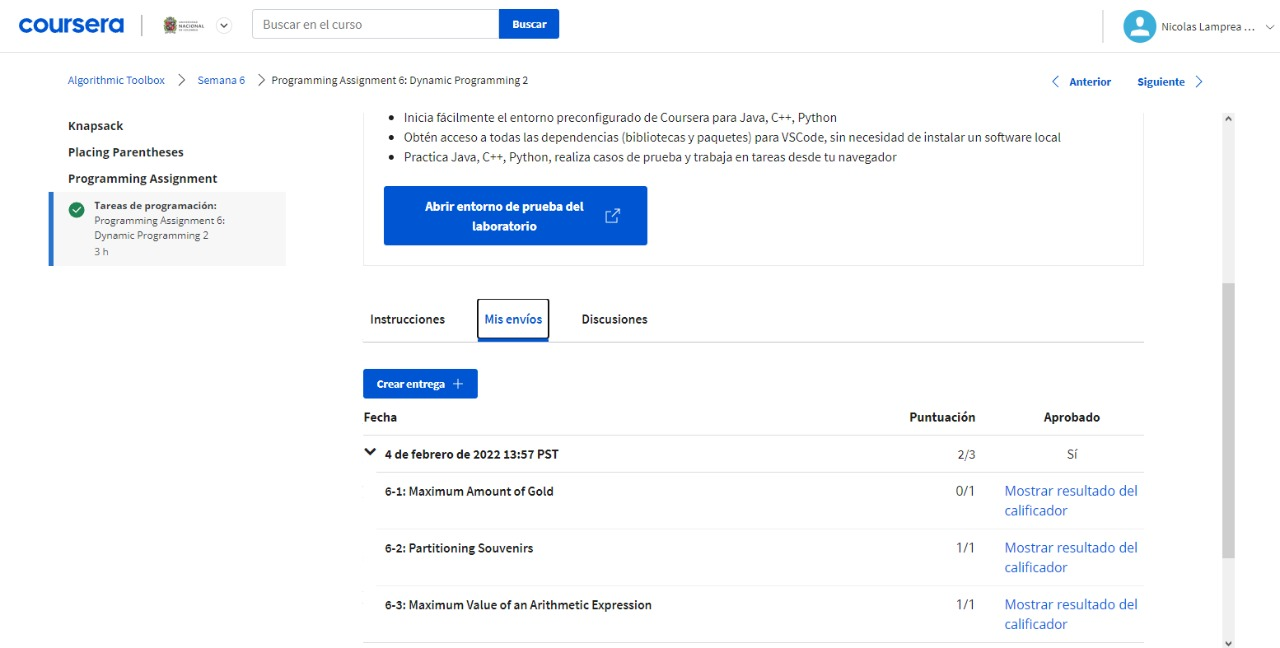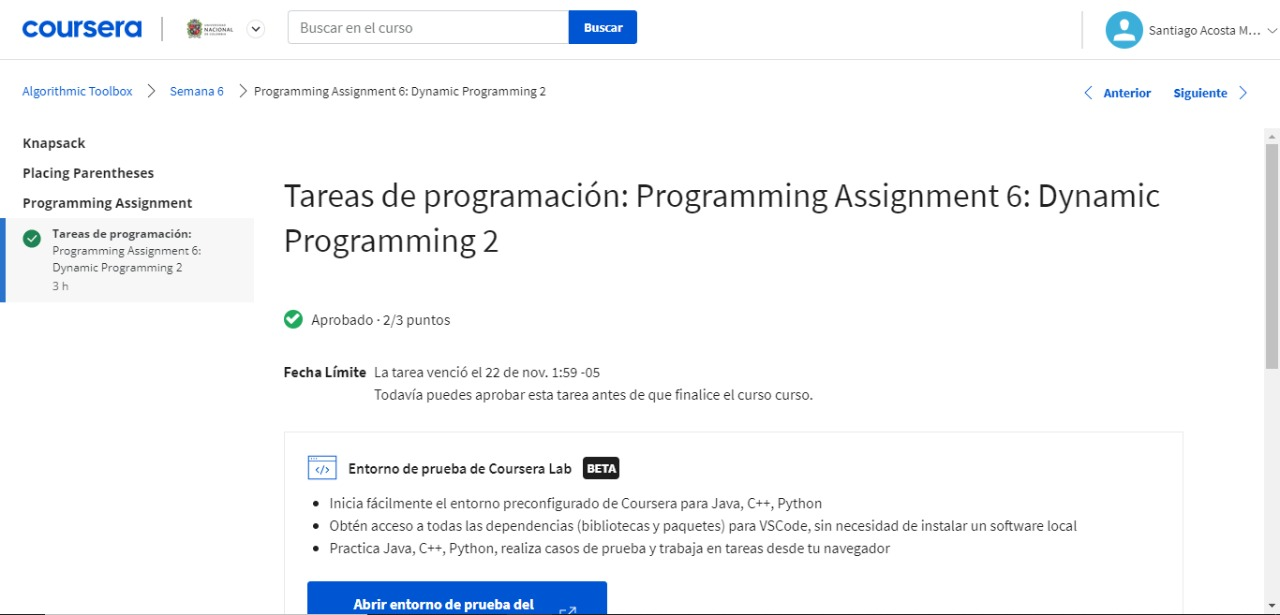